# Persistent Homology of Graphs

<br>

Contents:
- Random Graphs
- Persistent Homology
- Distances for Persistence Diagrams

<hr>

In [15]:
import os
import sys
import numpy as np
from numpy.random import default_rng
import math
import networkx as nx
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from scipy import sparse
from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt
%matplotlib inline

import gtda
import persim
import gudhi as gd
from gudhi.wasserstein import wasserstein_distance
from gtda.graphs import GraphGeodesicDistance
from gtda.homology import VietorisRipsPersistence, SparseRipsPersistence, FlagserPersistence
from gtda.diagrams import PersistenceEntropy, PersistenceImage, BettiCurve
from pyflagser import *
from igraph import Graph
from IPython.display import SVG, display

from utils import *
from random_digraphs import *

## Random Graphs

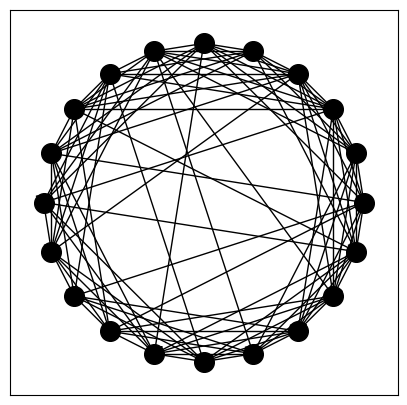

In [12]:
#Random undirected and directed graphs

#Erdos-Renyi G(n, M) randon model
GnM_und = nx.gnm_random_graph(20, 60, seed=2139, directed=False) #undirected
GnM_dir = nx.gnm_random_graph(20, 60, seed=2139, directed=True) #directed

#Watts–Strogatz small-world graph
WS_und = nx.watts_strogatz_graph(20, 10, 0.15, seed=2139) #undirected

#Random d-regular graph on n nodes
KR_und = nx.random_regular_graph(5, 20, seed=2139) #undirected


#Visualization of the Watts–Strogatz small-world graph
plt.figure(3,figsize=(5,5))
nx.draw_networkx(WS_und, pos=nx.circular_layout(WS_und), node_color="#000000", node_size=200, 
        connectionstyle='arc3, rad = 0.06', edgecolors='black')

In [16]:
#NumPy matrix or array to SciPy sparse matrix

#From graph to adjacency matrix
A_GnM_und = nx.adjacency_matrix(GnM_und)
A_GnM_dir = nx.adjacency_matrix(GnM_dir)
A_WS_und = nx.adjacency_matrix(WS_und)
A_KR_und = nx.adjacency_matrix(KR_und)

#SciPy sparse matrix
M_GnM_und = sparse.csr_matrix(A_GnM_und) #CSR: Compressed Sparse Row matrix
M_GnM_dir = sparse.csr_matrix(A_GnM_dir)
M_WS_und = sparse.csr_matrix(A_WS_und)
M_KR_und = sparse.csr_matrix(A_KR_und)

## Persistent Homology

In [33]:
#Persistent homology diagram for undirected graphs
#Vietoris-Rips Persistence
#Preprocessing (unweighted graphs): GraphGeodesicDistance

#Erdos-Renyi G(n, M) graph
X_ggd = GraphGeodesicDistance(directed=False, unweighted=True).fit_transform([M_GnM_und])
diagram_VR_GnM = VietorisRipsPersistence(metric="precomputed").fit_transform_plot(X_ggd);

In [ ]:
#Remark: homological death is actually cohomological birth and vice versa.

In [57]:
#[x, y, z] = [birth, death, Betti number]
diagram_VR_GnM

array([[[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.]]])

In [58]:
#Betti curve
BettiCurve().fit_transform_plot(diagram_VR_GnM);

In [35]:
#Watts–Strogatz small-world graph
X_ggd = GraphGeodesicDistance(directed=False, unweighted=True).fit_transform([M_WS_und])
diagram_VR_WS = VietorisRipsPersistence(metric="precomputed").fit_transform_plot(X_ggd);

In [36]:
#[x, y, z] = [birth, death, Betti number]
diagram_VR_WS  

array([[[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]])

In [56]:
#Betti curve
BettiCurve().fit_transform_plot(diagram_VR_WS);

In [53]:
#Random d-regular graph
X_ggd = GraphGeodesicDistance(directed=False, unweighted=True).fit_transform([M_KR_und])
diagram_VR_KR = VietorisRipsPersistence(metric="precomputed").fit_transform_plot(X_ggd);

In [54]:
#[x, y, z] = [birth, death, Betti number]
diagram_VR_KR  

array([[[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.],
        [1., 2., 1.]]])

In [55]:
#Betti curve
BettiCurve().fit_transform_plot(diagram_VR_KR);

In [37]:
#Flagser: Persistent homology for digraphs

#Erdos-Renyi G(n, M) digraph
diagram_Flagser = FlagserPersistence(homology_dimensions=(0,1,2,3,4)).fit_transform_plot([M_GnM_dir]);

In [38]:
#[x, y, z] = [birth, death, Betti number]
diagram_Flagser

array([[[ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 1., inf,  1.],
        [ 1., inf,  1.],
        [ 1., inf,  1.],
        [ 1., inf,  1.],
        [ 1., inf,  1.],
        [ 1., inf,  1.],
        [ 1., inf,  1.],
        [ 1., inf,  1.],
        [ 1., inf,  1.],
        [ 1., inf,  1.],
        [ 1., inf,  1.],
        [ 1., inf,  1.],
        [ 1., inf,  1.],
        [ 1., inf,  1.],
        [ 1., inf,  2.],
        [ 1., inf,  2.],
        [ 0.,  0.,  3.],
        [ 0.,  0.,  4.]]])

In [39]:
#Betti curve
BettiCurve().fit_transform_plot(diagram_Flagser);

## Distances for Persistence Diagrams

In [ ]:
def remove_inf(diag):
    R = diag
    R_without_inf = []
    for i in range(len(R[0])):
        if R[0][i][1] != math.inf:
            R_without_inf.append(R[0][i])
    return np.array(R_without_inf)

In [63]:
#Wasserstein distance: GnM vs WS

dwp = persim.wasserstein(diagram_VR_GnM[0],diagram_VR_WS[0])
dwp

4.242640687119286

In [64]:
#Wasserstein distance: GnM vs KR

dwp = persim.wasserstein(diagram_VR_GnM[0],diagram_VR_KR[0])
dwp

8.485281374238573

In [69]:
#Wasserstein distance: WS vs KR

dwp = persim.wasserstein(diagram_VR_WS[0],diagram_VR_KR[0])
dwp

12.727922061357857

In [65]:
#Bottleneck distance: GnM vs WS

bnd = persim.bottleneck(diagram_VR_GnM[0], diagram_VR_WS[0])
bnd

0.5

In [66]:
#Bottleneck distance: GnM vs Kr

bnd = persim.bottleneck(diagram_VR_GnM[0], diagram_VR_KR[0])
bnd

0.5

In [68]:
#Bottleneck distance: WS vs Kr

bnd = persim.bottleneck(diagram_VR_WS[0], diagram_VR_KR[0])
bnd

0.5

In [51]:
#Persistence Entropy: GnM vs WS

PE = PersistenceEntropy()
print(PE.fit_transform(diagram_VR_GnM))
print(PE.fit_transform(diagram_VR_WS))

[[4.24792751 2.5849625 ]]
[[ 4.24792751 -1.        ]]


In [67]:
#Persistence Entropy: GnM vs KR

PE = PersistenceEntropy()
print(PE.fit_transform(diagram_VR_GnM))
print(PE.fit_transform(diagram_VR_KR))

[[4.24792751 2.5849625 ]]
[[4.24792751 4.169925  ]]
